# Coursera Applied Data Science Capstone project

## This notebook will be mainly used for the Capstone project that uses the accidents data from Seattle city

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
print ("Hello Capstone Project Course!")

Hello Capstone Project Course!


## Business Understanding

The problem statement is to predict the severity of road accidents caused by various factors in Seattle City. The accurate prediction of accident severity will be of great help to the following target audience. 

### 1. City administration
The Seattle City administration can use the predictions to come up with various precautionary measures such as introduction of speed breakers, setting up speed limits, deploying more traffic control teams etc. in areas that are more prone to accidents. The administration can also look for factors other than location to come up with awareness campaigns for city dwellers on how to drive carefully in order to avoid accidents.

### 2. Emergency response teams
Emergency reponse teams can be stationed near high accident prone areas in order to quickly help the victims of accidents so that they are taken to hospitals on time to save lives. 


## Data Understanding

### Import the dataset

In [3]:
df = pd.read_csv("Data-Collisions.csv.1")
df.head() # Display the first 5 rows of the dataframe

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


### Following are the different columns in the dataset and their description from the metadata file.

1. SEVERITYCODE - A code that corresponds to the severity of the collision. This is our target variable.
2. 'X'
3. 'Y'
4. OBJECTID - ESRI unique identifier
5. INCKEY - A unique key for the incident
6. COLDETKEY - Secondary key for the incident
7. REPORTNO 
8. STATUS
9. ADDRTYPE - Collision address type
10. INTKEY - Key that corresponds to the intersection associated with a collision
11. LOCATION - Description of the general location of the collision
12. EXCEPTRSNCODE 
13. EXCEPTRSNDESC
14. SEVERITYCODE.1
15. SEVERITYDESC - A detailed description of the severity of the collision
16. COLLISIONTYPE - Collision type
17. PERSONCOUNT - The total number of people involved in the collision
18. PEDCOUNT - The number of pedestrians involved in the collision
19. PEDCYLCOUNT - The number of bicycles involved in the collision
20. VEHCOUNT - The number of vehicles involved in the collision
21. INCDATE - The date of the incident
22. INCDTTM - The date and time of the incident
23. JUNCTIONTYPE - Category of junction at which collision took place
24. SDOT_COLCODE - A code given to the collision by SDOT
25. SDOT_COLDESC - A description of the collision corresponding to the collision code
26. INATTENTIONIND - Whether or not collision was due to inattention
27. UNDERINFL - Whether or not a driver involved was under the influence of drugs or alcohol
28. WEATHER - A description of the weather conditions during the time of the collision
29. ROADCOND - The condition of the road during the collision
30. LIGHTCOND - The light conditions during the collision
31. PEDROWNOTGRNT - Whether or not the pedestrian right of way was not granted
32. SDOTCOLNUM - A number given to the collision by SDOT
33. SPEEDING - Whether or not speeding was a factor in the collision
34. ST_COLCODE - A code provided by the state that describes the collision
35. ST_COLDESC - A description that corresponds to the state’s coding designation
36. SEGLANEKEY - A key for the lane segment in which the collision occurred
37. CROSSWALKKEY - A key for the crosswalk at which the collision occurred
38. HITPARKEDCAR - Whether or not the collision involved hitting a parked car


### Select the feature variables

In [4]:
#Columns in the dataset
df.columns

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

### As a first step, ignore the columns that are redundant, the columns for which there are no descriptions available in the metadata, the columns that have large descriptions as their values and the columns that do not contibute to the prediction of accident severity. That leaves us with the following columns.

1. SEVERITYCODE - A code that corresponds to the severity of the collision. This is the target variable.
2. ADDRTYPE - Collision address type
3. INTKEY - Key that corresponds to the intersection associated with a collision
4. COLLISIONTYPE - Collision type
5. PERSONCOUNT - The total number of people involved in the collision
6. PEDCOUNT - The number of pedestrians involved in the collision
7. PEDCYLCOUNT - The number of bicycles involved in the collision
8. VEHCOUNT - The number of vehicles involved in the collision
9. JUNCTIONTYPE - Category of junction at which collision took place
10. INATTENTIONIND - Whether or not collision was due to inattention
11. UNDERINFL - Whether or not a driver involved was under the influence of drugs or alcohol
12. WEATHER - A description of the weather conditions during the time of the collision
13. ROADCOND - The condition of the road during the collision
14. LIGHTCOND - The light conditions during the collision
15. PEDROWNOTGRNT - Whether or not the pedestrian right of way was not granted
16. SPEEDING - Whether or not speeding was a factor in the collision
17. HITPARKEDCAR - Whether or not the collision involved hitting a parked car

In [5]:
#Drop the irrelevant columns
df.drop(columns = ['OBJECTID','INCKEY','COLDETKEY','X','Y','REPORTNO','STATUS','SDOTCOLNUM','LOCATION','EXCEPTRSNCODE','EXCEPTRSNDESC','SEVERITYCODE.1','SEVERITYDESC','INCDATE','INCDTTM','SDOT_COLDESC','ST_COLDESC','SEGLANEKEY','CROSSWALKKEY','SDOT_COLCODE','ST_COLCODE'],axis = 1,inplace = True)

In [6]:
df.head()

,SEVERITYCODE,ADDRTYPE,INTKEY,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,JUNCTIONTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,HITPARKEDCAR
0,2,Intersection,37475.0,Angles,2,0,0,2,At Intersection (intersection related),NaN,N,Overcast,Wet,Daylight,NaN,NaN,N
1,1,Block,NaN,Sideswipe,2,0,0,2,Mid-Block (not related to intersection),NaN,0,Raining,Wet,Dark - Street Lights On,NaN,NaN,N
2,1,Block,NaN,Parked Car,4,0,0,3,Mid-Block (not related to intersection),NaN,0,Overcast,Dry,Daylight,NaN,NaN,N
3,1,Block,NaN,Other,3,0,0,3,Mid-Block (not related to intersection),NaN,N,Clear,Dry,Daylight,NaN,NaN,N
4,2,Intersection,34387.0,Angles,2,0,0,2,At Intersection (intersection related),NaN,0,Raining,Wet,Daylight,NaN,NaN,N


In [7]:
#Check the size of the dataset
df.shape

(194673, 17)

In [8]:
# Check for null values in the dataset
df.isnull().sum()

SEVERITYCODE           0
ADDRTYPE            1926
INTKEY            129603
COLLISIONTYPE       4904
PERSONCOUNT            0
PEDCOUNT               0
PEDCYLCOUNT            0
VEHCOUNT               0
JUNCTIONTYPE        6329
INATTENTIONIND    164868
UNDERINFL           4884
WEATHER             5081
ROADCOND            5012
LIGHTCOND           5170
PEDROWNOTGRNT     190006
SPEEDING          185340
HITPARKEDCAR           0
dtype: int64

#### INTKEY, INATTENTIONIND, PEDROWNOTGRNT and SPEEDING columns have mostly null values. Hence, we will remove those columns from the dataframe. 

In [9]:
df.drop(columns = ["INTKEY","INATTENTIONIND","PEDROWNOTGRNT","SPEEDING"],axis = 1, inplace = True)

### Now we have reduced the number of columns to the following.

1. SEVERITYCODE - A code that corresponds to the severity of the collision. This is the target variable.
2. ADDRTYPE - Collision address type
3. COLLISIONTYPE - Collision type
4. PERSONCOUNT - The total number of people involved in the collision
5. PEDCOUNT - The number of pedestrians involved in the collision
6. PEDCYLCOUNT - The number of bicycles involved in the collision
7. VEHCOUNT - The number of vehicles involved in the collision
8. JUNCTIONTYPE - Category of junction at which collision took place
9. UNDERINFL - Whether or not a driver involved was under the influence of drugs or alcohol
10. WEATHER - A description of the weather conditions during the time of the collision
11. ROADCOND - The condition of the road during the collision
12. LIGHTCOND - The light conditions during the collision
13. HITPARKEDCAR - Whether or not the collision involved hitting a parked car

In [10]:
df.head()

,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,JUNCTIONTYPE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,HITPARKEDCAR
0,2,Intersection,Angles,2,0,0,2,At Intersection (intersection related),N,Overcast,Wet,Daylight,N
1,1,Block,Sideswipe,2,0,0,2,Mid-Block (not related to intersection),0,Raining,Wet,Dark - Street Lights On,N
2,1,Block,Parked Car,4,0,0,3,Mid-Block (not related to intersection),0,Overcast,Dry,Daylight,N
3,1,Block,Other,3,0,0,3,Mid-Block (not related to intersection),N,Clear,Dry,Daylight,N
4,2,Intersection,Angles,2,0,0,2,At Intersection (intersection related),0,Raining,Wet,Daylight,N


In [11]:
# Check for null values in the dataset
df.isnull().sum()

SEVERITYCODE        0
ADDRTYPE         1926
COLLISIONTYPE    4904
PERSONCOUNT         0
PEDCOUNT            0
PEDCYLCOUNT         0
VEHCOUNT            0
JUNCTIONTYPE     6329
UNDERINFL        4884
WEATHER          5081
ROADCOND         5012
LIGHTCOND        5170
HITPARKEDCAR        0
dtype: int64

### Examine the correlation between the different feature variables identified so far and the target variable through various plots

In [12]:
# Data types of the variables
df.dtypes

SEVERITYCODE      int64
ADDRTYPE         object
COLLISIONTYPE    object
PERSONCOUNT       int64
PEDCOUNT          int64
PEDCYLCOUNT       int64
VEHCOUNT          int64
JUNCTIONTYPE     object
UNDERINFL        object
WEATHER          object
ROADCOND         object
LIGHTCOND        object
HITPARKEDCAR     object
dtype: object

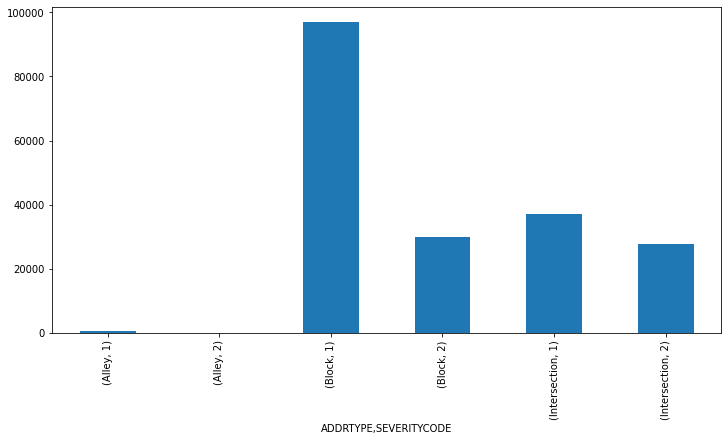

In [13]:
# ADDRTYPE vs SEVERITYCODE
plt.figure(figsize = (12,6))
df.groupby("ADDRTYPE")["SEVERITYCODE"].value_counts().plot(kind='bar');

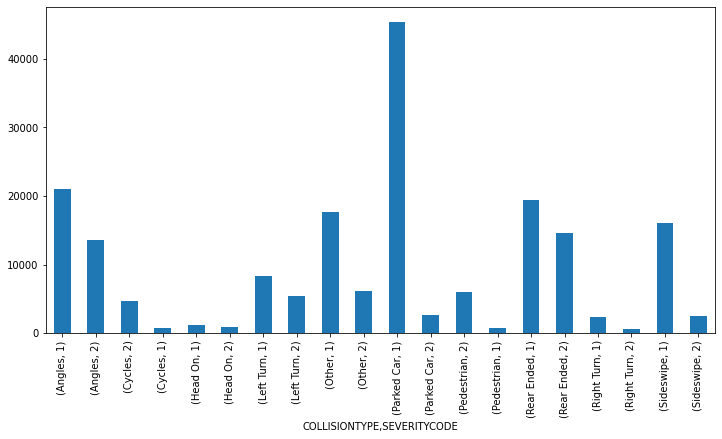

In [14]:
# COLLISIONTYPE vs SEVERITYCODE
plt.figure(figsize = (12,6))
df.groupby("COLLISIONTYPE")["SEVERITYCODE"].value_counts().plot(kind='bar');

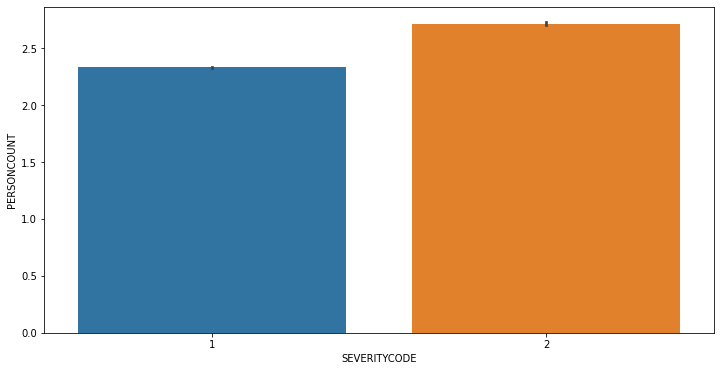

In [15]:
# PERSONCOUNT vs SEVERITYCODE
plt.figure(figsize = (12,6))
sns.barplot(x = "SEVERITYCODE",y = "PERSONCOUNT",data = df);

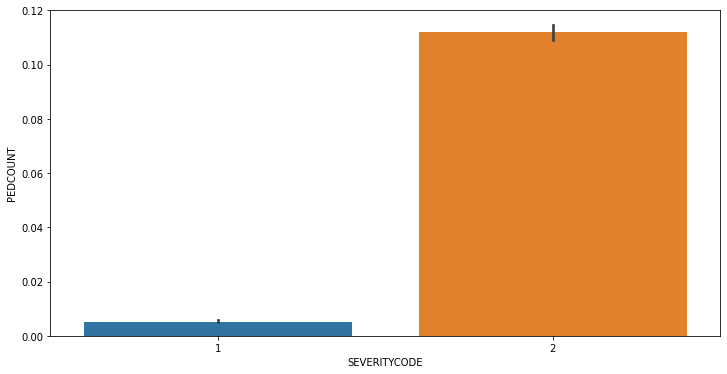

In [16]:
# PEDCOUNT vs SEVERITYCODE
plt.figure(figsize = (12,6))
sns.barplot(x = "SEVERITYCODE",y = "PEDCOUNT",data = df);

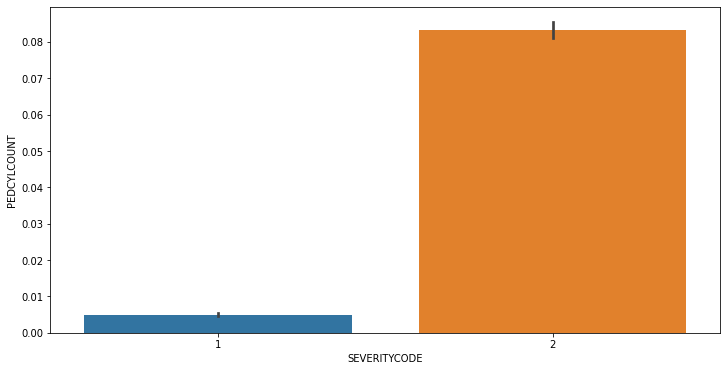

In [17]:
# PEDCYLCOUNT vs SEVERITYCODE
plt.figure(figsize = (12,6))
sns.barplot(x = "SEVERITYCODE",y = "PEDCYLCOUNT",data = df);

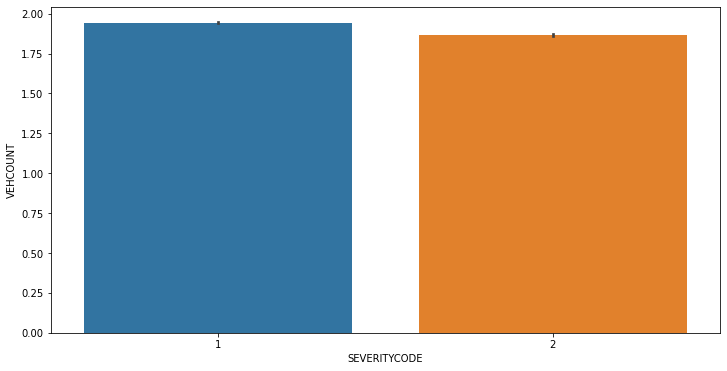

In [18]:
# VEHCOUNT vs SEVERITYCODE
plt.figure(figsize = (12,6))
sns.barplot(x = "SEVERITYCODE",y = "VEHCOUNT",data = df);

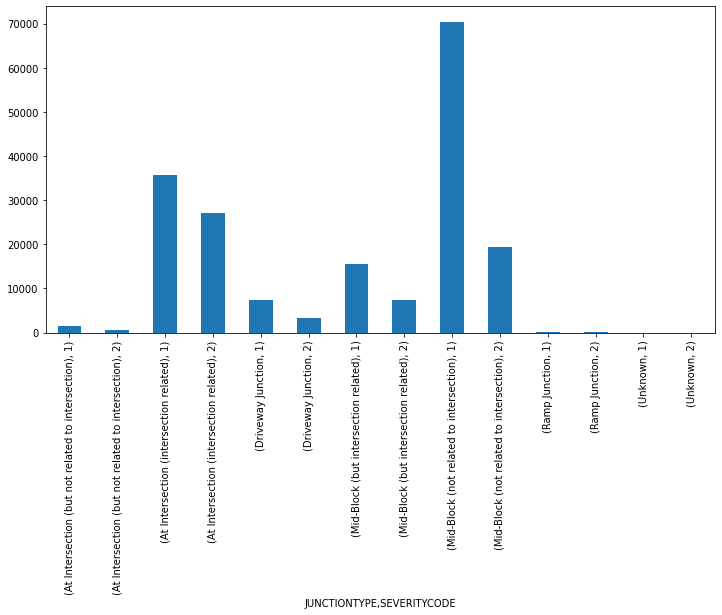

In [19]:
# JUNCTIONTYPE vs SEVERITYCODE
plt.figure(figsize = (12,6))
df.groupby("JUNCTIONTYPE")["SEVERITYCODE"].value_counts().plot(kind='bar');

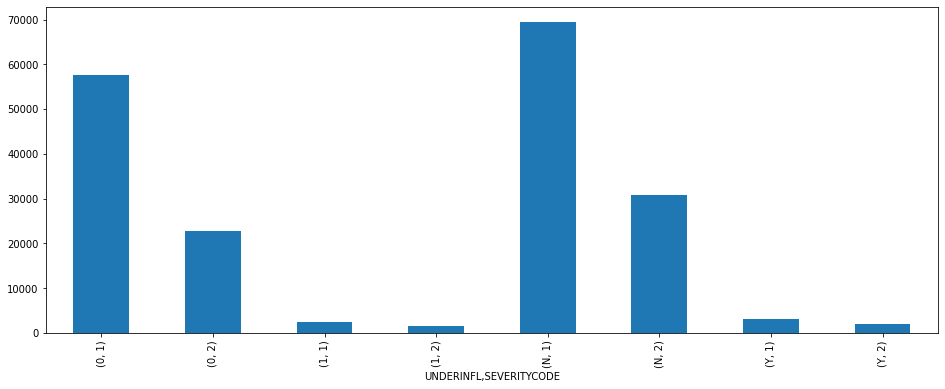

In [20]:
# UNDERINFL vs SEVERITYCODE
plt.figure(figsize = (16,6))
df.groupby("UNDERINFL")["SEVERITYCODE"].value_counts().plot(kind='bar');

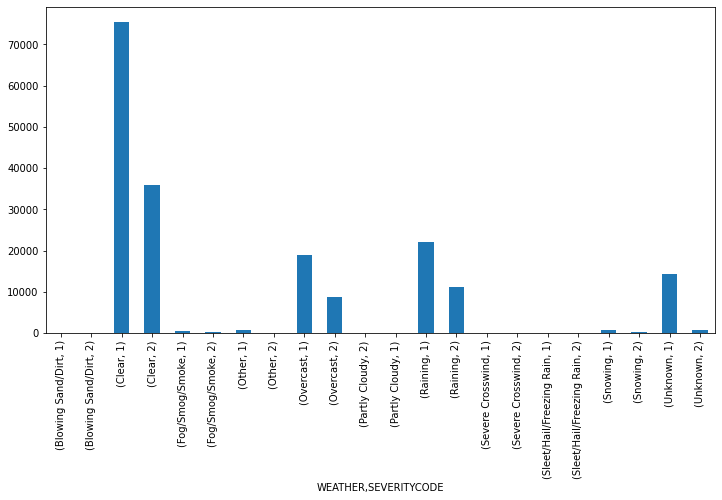

In [21]:
# WEATHER vs SEVERITYCODE
plt.figure(figsize = (12,6))
df.groupby("WEATHER")["SEVERITYCODE"].value_counts().plot(kind='bar');

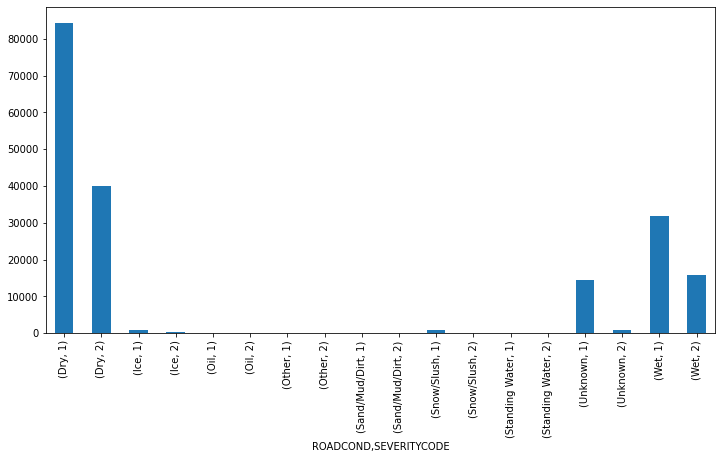

In [22]:
# ROADCOND vs SEVERITYCODE
plt.figure(figsize = (12,6))
df.groupby("ROADCOND")["SEVERITYCODE"].value_counts().plot(kind='bar');

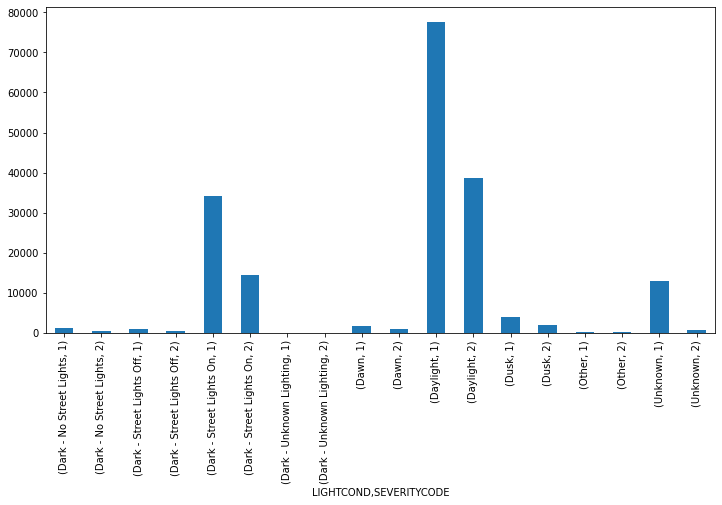

In [23]:
# LIGHTCOND vs SEVERITYCODE
plt.figure(figsize = (12,6))
df.groupby("LIGHTCOND")["SEVERITYCODE"].value_counts().plot(kind='bar');

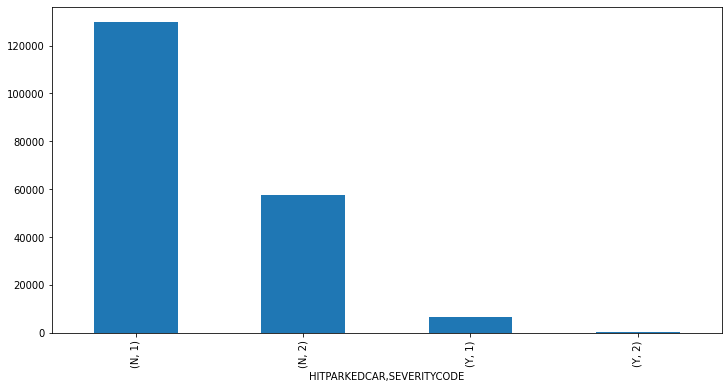

In [24]:
# HITPARKEDCAR vs SEVERITYCODE
plt.figure(figsize = (12,6))
df.groupby("HITPARKEDCAR")["SEVERITYCODE"].value_counts().plot(kind='bar');

#### From the above plots, we see that PERSONCOUNT and VEHCOUNT  are poorly correlated with SEVERITYCODE. Hence, we will drop those variables from our feature set.

In [25]:
df.drop(columns = ['PERSONCOUNT','VEHCOUNT'],axis = 1, inplace = True)

In [26]:
df.head()

,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,PEDCOUNT,PEDCYLCOUNT,JUNCTIONTYPE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,HITPARKEDCAR
0,2,Intersection,Angles,0,0,At Intersection (intersection related),N,Overcast,Wet,Daylight,N
1,1,Block,Sideswipe,0,0,Mid-Block (not related to intersection),0,Raining,Wet,Dark - Street Lights On,N
2,1,Block,Parked Car,0,0,Mid-Block (not related to intersection),0,Overcast,Dry,Daylight,N
3,1,Block,Other,0,0,Mid-Block (not related to intersection),N,Clear,Dry,Daylight,N
4,2,Intersection,Angles,0,0,At Intersection (intersection related),0,Raining,Wet,Daylight,N


In [27]:
df.shape

(194673, 11)

### Following is the final set of feature variables that we will use to predict accident severity

1. ADDRTYPE
2. COLLISIONTYPE
3. PEDCOUNT
4. PEDCYLCOUNT
5. JUNCTIONTYPE
6. UNDERINFL
7. WEATHER
8. ROADCOND
9. LIGHTCOND
10. HITPARKEDCAR

## Data Preparation

In [28]:
# Remove the rows that have null values
df.dropna(inplace = True)

In [29]:
#Check for null values in the dataset
df.isnull().sum()

SEVERITYCODE     0
ADDRTYPE         0
COLLISIONTYPE    0
PEDCOUNT         0
PEDCYLCOUNT      0
JUNCTIONTYPE     0
UNDERINFL        0
WEATHER          0
ROADCOND         0
LIGHTCOND        0
HITPARKEDCAR     0
dtype: int64

### Balance the dataset

In [30]:
#Check if the dataset is imbalanced
df["SEVERITYCODE"].value_counts()

1    126270
2     56625
Name: SEVERITYCODE, dtype: int64

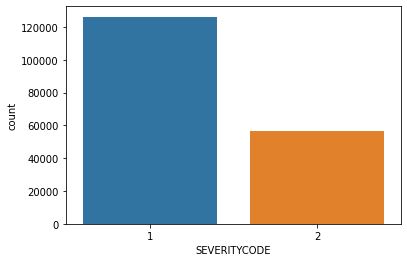

In [31]:
#Plot the severity code value count to visually understand the magnitude of the dataset imbalance
sns.countplot(df["SEVERITYCODE"]);

In [32]:
# Balance the dataset
## Separate majority and minority classes
from sklearn.utils import resample
df_sev1 = df[df.SEVERITYCODE==1]
df_sev2 = df[df.SEVERITYCODE==2]
 
# Upsample minority class
df_sev2_upsampled = resample(df_sev2, 
                                 replace=True,     # sample with replacement
                                 n_samples=126270, # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df = pd.concat([df_sev1, df_sev2_upsampled])
 
# Display new class counts
df["SEVERITYCODE"].value_counts()

2    126270
1    126270
Name: SEVERITYCODE, dtype: int64

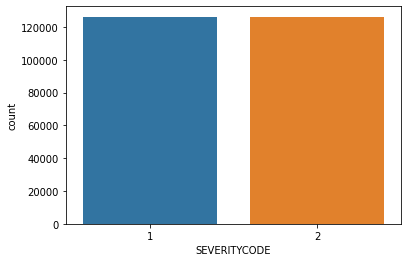

In [33]:
#Plot the severity code value count to visually understand the magnitude of the dataset imbalance
sns.countplot(df["SEVERITYCODE"]);

#### Check the individual values for each categorical variable

In [34]:
df["ADDRTYPE"].unique()

array(['Block', 'Intersection', 'Alley'], dtype=object)

In [35]:
df["COLLISIONTYPE"].unique()

array(['Sideswipe', 'Parked Car', 'Other', 'Angles', 'Rear Ended',
       'Left Turn', 'Cycles', 'Pedestrian', 'Right Turn', 'Head On'],
      dtype=object)

In [36]:
df["JUNCTIONTYPE"].unique()

array(['Mid-Block (not related to intersection)',
       'At Intersection (intersection related)', 'Driveway Junction',
       'Mid-Block (but intersection related)',
       'At Intersection (but not related to intersection)',
       'Ramp Junction', 'Unknown'], dtype=object)

In [37]:
df["UNDERINFL"].unique()

array(['0', 'N', '1', 'Y'], dtype=object)

In [38]:
# Replace all 'N's with '0's and 'Y's with '1's
df["UNDERINFL"].replace('N','0',inplace = True)
df["UNDERINFL"].replace('Y','1',inplace = True)

In [39]:
df["UNDERINFL"].unique()

array(['0', '1'], dtype=object)

In [40]:
df["WEATHER"].unique()

array(['Raining', 'Overcast', 'Clear', 'Unknown', 'Other', 'Snowing',
       'Sleet/Hail/Freezing Rain', 'Fog/Smog/Smoke', 'Blowing Sand/Dirt',
       'Severe Crosswind', 'Partly Cloudy'], dtype=object)

In [41]:
df["ROADCOND"].unique()

array(['Wet', 'Dry', 'Unknown', 'Snow/Slush', 'Ice', 'Other',
       'Sand/Mud/Dirt', 'Standing Water', 'Oil'], dtype=object)

In [42]:
df["LIGHTCOND"].unique()

array(['Dark - Street Lights On', 'Daylight', 'Dark - No Street Lights',
       'Unknown', 'Dusk', 'Other', 'Dawn', 'Dark - Unknown Lighting',
       'Dark - Street Lights Off'], dtype=object)

In [43]:
df["HITPARKEDCAR"].unique()

array(['N', 'Y'], dtype=object)

In [44]:
# Replace all 'N's with '0's and 'Y's with '1's
df["HITPARKEDCAR"].replace('N','0',inplace = True)
df["HITPARKEDCAR"].replace('Y','1',inplace = True)

In [45]:
df["HITPARKEDCAR"].unique()

array(['0', '1'], dtype=object)

### Convert all categorical data to continuous data

In [46]:
df = pd.get_dummies(df, columns=["ADDRTYPE","COLLISIONTYPE","JUNCTIONTYPE","WEATHER","LIGHTCOND","ROADCOND"])
df.head()

,SEVERITYCODE,PEDCOUNT,PEDCYLCOUNT,UNDERINFL,HITPARKEDCAR,ADDRTYPE_Alley,ADDRTYPE_Block,ADDRTYPE_Intersection,COLLISIONTYPE_Angles,COLLISIONTYPE_Cycles,...,LIGHTCOND_Unknown,ROADCOND_Dry,ROADCOND_Ice,ROADCOND_Oil,ROADCOND_Other,ROADCOND_Sand/Mud/Dirt,ROADCOND_Snow/Slush,ROADCOND_Standing Water,ROADCOND_Unknown,ROADCOND_Wet
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
